In [1]:
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
strokes = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='work_type', ylabel='stroke'>

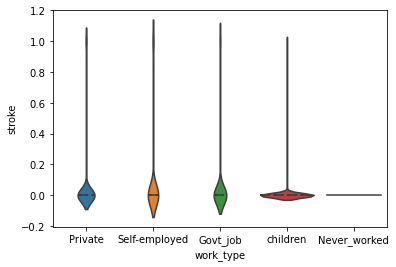

In [6]:
sns.violinplot(y='stroke', x='work_type', data=strokes, inner='quartile')

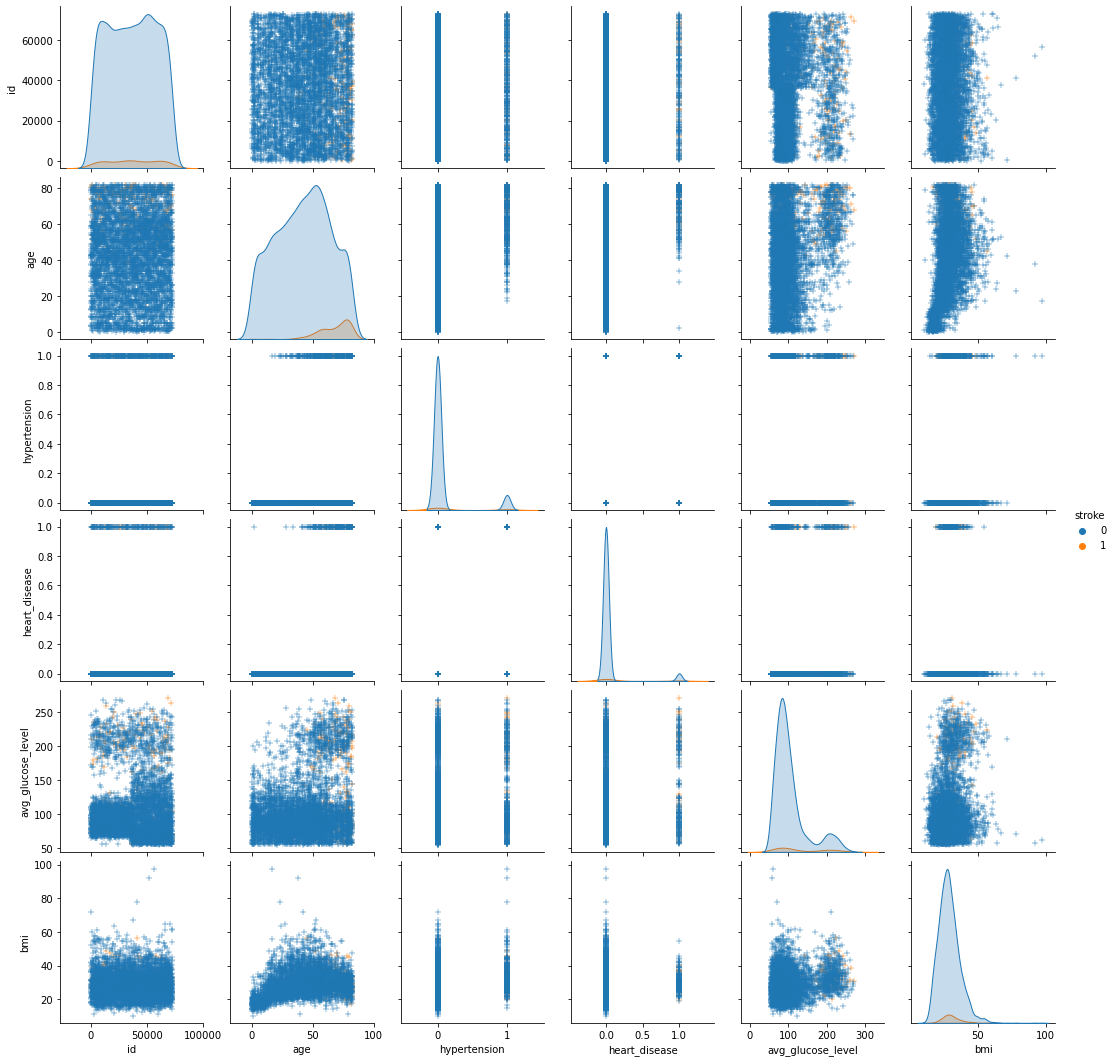

In [7]:
sns.pairplot(strokes, hue='stroke', markers='+')

In [8]:
def ToNumData(X):
    for col in X.columns:
        if col == "gender":
            for row_nr in range(len(X[col])):
                if(X[col].iloc[row_nr] == "Male"):
                    X[col].iloc[row_nr] = 0
                elif (X[col].iloc[row_nr] == "Female"):
                    X[col].iloc[row_nr] = 1 
                elif (X[col].iloc[row_nr] == "Other"):
                    X[col].iloc[row_nr] = -1 
            
        elif col == "ever_married":
            for row_nr in range(len(X[col])):
                if(X[col].iloc[row_nr] == "Yes"):
                    X[col].iloc[row_nr] = 1
                elif (X[col].iloc[row_nr] == "No"):
                    X[col].iloc[row_nr] = 0 
            
        elif col == "Residence_type":
            for row_nr in range(len(X[col])):
                if(X[col].iloc[row_nr] == "Rural"):
                    X[col].iloc[row_nr] = 1
                elif (X[col].iloc[row_nr] == "Urban"):
                    X[col].iloc[row_nr] = 0 
             
        elif col == "smoking_status":
            for row_nr in range(len(X[col])):
                if(X[col].iloc[row_nr] == "formerly smoked"):
                    X[col].iloc[row_nr] = 1
                elif (X[col].iloc[row_nr] == "never smoked"):
                    X[col].iloc[row_nr] = 0  
                elif (X[col].iloc[row_nr] == "smokes"):
                    X[col].iloc[row_nr] = 2 
                elif (X[col].iloc[row_nr] == "Unknown"):
                    X[col].iloc[row_nr] = -1  
        
        elif col == "work_type":
            for row_nr in range(len(X[col])):
                if(X[col].iloc[row_nr] == "Never_worked"):
                    X[col].iloc[row_nr] = 0
                elif (X[col].iloc[row_nr] == "Govt_job"):
                    X[col].iloc[row_nr] = 1  
                elif (X[col].iloc[row_nr] == "Private"):
                    X[col].iloc[row_nr] = 2 
                elif (X[col].iloc[row_nr] == "children"):
                    X[col].iloc[row_nr] = -1  
                elif (X[col].iloc[row_nr] == "Self-employed"):
                    X[col].iloc[row_nr] = 3  
                        
    return X

In [9]:
#Dropping rows where bmi is NaN
strokes.dropna(subset= ["bmi"], inplace=True)

#Changing non-numeric data to numeric types
strokes = ToNumData(strokes)
strokes["gender"] = pd.to_numeric(strokes["gender"])
strokes["ever_married"] = pd.to_numeric(strokes["ever_married"])
strokes["Residence_type"] = pd.to_numeric(strokes["Residence_type"])
strokes["smoking_status"] = pd.to_numeric(strokes["smoking_status"])
strokes["work_type"] = pd.to_numeric(strokes["work_type"])


c:\Users\piter\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
strokesTrain = strokes.sample(frac=0.7, random_state=1) 
strokesVal = strokes.drop(strokesTrain.index)

yTrain = strokesTrain["stroke"]
xTrain = strokesTrain.drop("stroke", axis = 1).drop("id", axis = 1)
print(xTrain)

yVal = strokesVal["stroke"]
xVal = strokesVal.drop("stroke", axis = 1).drop("id", axis = 1)
print(xVal)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
2648       0  52.0             0              0             1          1   
3441       1  59.0             0              0             1          3   
4935       0  16.0             0              0             0          2   
1316       1  21.0             0              0             0          2   
3271       0  36.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
817        0  12.0             0              0             0         -1   
1421       0   9.0             0              0             0         -1   
2607       0  21.0             0              0             0          2   
4087       1   8.0             0              0             0         -1   
1114       1  42.0             1              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2648               1   

In [11]:
means = strokesTrain.groupby(["stroke"]).mean() 
#returns mean values of attributes grouped by "stroke" attribute

var = strokesTrain.groupby(["stroke"]).var() 
#returns unbiased variances of attributes grouped by "stroke" attribute

classes = np.unique(strokesTrain["stroke"].tolist())
#returns classes based on "stroke" attribute

prior = (strokesTrain.groupby(["stroke"]).count()/len(strokesTrain)).iloc[:,0]
#returns estimated prior probabilities


In [24]:
def Normal(n, mu, var):
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((n - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))    
    return pdf # pdf - probability density function

def Predict(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class
            
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in X.columns: # Loop through each feature
                
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(X) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [25]:
PredictTrain = Predict(xTrain)
PredictVal = Predict(xVal)

2648
3441
4935
1316
3271
1628
843
1046
2721
2731
563
1155
1538
4161
4311
1078
2551
3000
4610
1302
3581
390
3689
3858
3613
4666
259
1778
2094
4007
3558
2342
3405
1986
4844
1666
4270
4673
692
4029
830
391
2888
4187
2310
889
5016
1298
2996
3087
2345
4732
1104
963
3890
1544
2774
4098
3175
4919
1344
1417
948
245
4064
1868
4176
3820
938
4364
1054
3958
4840
5077
4916
2001
2468
769
1142
3799
1606
4819
1664
3986
4023
1372
2244
1962
809
2267
1780
1625
1810
2931
4358
4877
3114
4708
2732
2328
1292
1826
2447
612
4582
1676
1767
4796
1425
3274
3322
1652
1453
4439
4563
1523
1139
2246
1673
549
3865
2218
1280
1844
3091
1892
1430
5032
4743
5037
288
3455
3757
71
3331
4719
4226
367
3110
2353
1884
4600
3550
1849
3046
2569
2096
4209
3106
3920
492
2992
3240
695
3807
4217
1092
3652
1243
2198
3498
2226
3646
4507
3672
2487
4966
3809
1013
927
2812
2362
4228
4404
2391
5027
2770
2803
471
3772
2214
4898
3232
4399
855
96
2296
2595
1204
4436
850
1223
645
999
4524
1793
4560
5011
4656
3517
656
3112
3679
633
3352
4180
29

In [14]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [15]:
round(Accuracy(yTrain, PredictTrain), 5)

0.86612

In [16]:
round(Accuracy(yVal, PredictVal), 5)

0.8649

In [17]:
def ColumnsSelection(y,X):
    for col in X.columns:
        x = X.drop(col, axis = 1)
        prediction = Predict(x)
        print("Accuracy without column "+col + ": " + str(round(Accuracy(y, prediction), 5)))

In [18]:

ColumnsSelection(yTrain,xTrain)

Accuracy without column gender: 0.86554
Accuracy without column age: 0.87194
Accuracy without column hypertension: 0.89261
Accuracy without column heart_disease: 0.87282
Accuracy without column ever_married: 0.87631
Accuracy without column work_type: 0.86932
Accuracy without column Residence_type: 0.86641
Accuracy without column avg_glucose_level: 0.87806
Accuracy without column bmi: 0.86787
Accuracy without column smoking_status: 0.86845


In [19]:
ColumnsSelection(yVal,xVal)

Accuracy without column gender: 0.86558
Accuracy without column age: 0.87508
Accuracy without column hypertension: 0.89545
Accuracy without column heart_disease: 0.88052
Accuracy without column ever_married: 0.87508
Accuracy without column work_type: 0.87441
Accuracy without column Residence_type: 0.8649
Accuracy without column avg_glucose_level: 0.88527
Accuracy without column bmi: 0.86762
Accuracy without column smoking_status: 0.8683


In [20]:
def colSelection(y,X):
    i = 1
    cols_and_acc = dict()
    for col1 in X.columns:
        x1 = X.drop(col1, axis = 1)
        for col2 in x1.columns:
            x2 = x1.drop(col2, axis = 1)
            prediction = Predict(x2)
            cols_and_acc[str(col1 + " and " + col2)] = round(Accuracy(y, prediction), 5)
            #print(str(i)+". Accuracy without columns "+ col1 + " and " + col2 + ": " + str(round(Accuracy(y, prediction), 5)))
            i+=1
    print("Accuracy without columns "+max(cols_and_acc, key=cols_and_acc.get)+": "+str(cols_and_acc[max(cols_and_acc, key=cols_and_acc.get)]))

In [21]:
colSelection(yVal,xVal)

Accuracy without columns hypertension and avg_glucose_level: 0.92532
